In [1]:
# Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
salary_data = pd.read_csv("data/data science salary.csv")

In [3]:
salary_data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


In [4]:
salary_data.shape

(3761, 9)

In [5]:
salary_data.dtypes

work_year            int64
experience_level    object
employment_type     object
job_title           object
salary               int64
salary_currency     object
salary_in_usd        int64
company_location    object
company_size        object
dtype: object

In [6]:
salary_data.describe()

,work_year,salary,salary_in_usd
count,3761.000000,3.761000e+03,3761.000000
mean,2022.374103,1.905999e+05,137555.178942
std,0.691252,6.711457e+05,63022.267974
min,2020.000000,6.000000e+03,5132.000000
25%,2022.000000,1.000000e+05,95000.000000
50%,2022.000000,1.375000e+05,135000.000000
75%,2023.000000,1.800000e+05,175000.000000
max,2023.000000,3.040000e+07,450000.000000


In [7]:
# Get unique values and data types for each column
unique_values = {column: salary_data[column].unique() for column in salary_data.columns}
data_types = salary_data.dtypes

print("Unique Values:")
for column, values in unique_values.items():
    print(f"{column}: {values}")

print("\nData Types:")
print(data_types)

Unique Values:
work_year: [2023 2022 2021 2020]
experience_level: ['EN' 'EX' 'MI' 'SE']
employment_type: ['FT' 'PT' 'CT' 'FL']
job_title: ['Applied Scientist' 'Data Quality Analyst' 'Compliance Data Analyst'
 'Machine Learning Engineer' 'Research Scientist' 'Data Engineer'
 'Data Analyst' 'Data Scientist' 'BI Data Engineer' 'Research Engineer'
 'Business Data Analyst' 'Autonomous Vehicle Technician'
 'Applied Machine Learning Scientist' 'AI Programmer' 'AI Developer'
 'Computer Vision Engineer' 'BI Developer' 'Big Data Engineer'
 'Deep Learning Engineer' 'Head of Data' 'Analytics Engineer'
 'Data Architect' 'Director of Data Science' 'Head of Data Science'
 'Data Analytics Manager' 'ML Engineer'
 'Applied Machine Learning Engineer' 'Applied Data Scientist'
 'ETL Engineer' 'Data Specialist' 'Lead Data Analyst' 'Data Manager'
 'Machine Learning Scientist' 'MLOps Engineer' 'Financial Data Analyst'
 'Software Data Engineer' 'Data Science Manager' 'Data Science Consultant'
 'Machine Learnin

In [8]:
missing_values = salary_data.isna().sum()
print(missing_values)

work_year           0
experience_level    0
employment_type     0
job_title           0
salary              0
salary_currency     0
salary_in_usd       0
company_location    0
company_size        0
dtype: int64


In [28]:
# Calculate the IQR for the Salary_in_usd column
Q1 = salary_data['salary_in_usd'].quantile(0.25)
Q3 = salary_data['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1
print("IQR:", IQR)

IQR: 80000.0


In [29]:
# Determine the upper and lower bounds for identifying outliers
lower_bound = (Q1 - IQR) * 1.5
upper_bound = (Q3 + IQR) * 1.5
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

Lower bound: 22500.0
Upper bound: 382500.0


In [30]:
# Identify outliers
outliers = salary_data[(salary_data['salary_in_usd'] < lower_bound) | (salary_data['salary_in_usd'] > upper_bound)]
outliers

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
15,2023,EN,FT,Data Engineer,1400000,INR,17022,IN,L
37,2023,EN,FT,Business Data Analyst,20000,EUR,21461,ES,M
40,2023,EN,FT,Autonomous Vehicle Technician,7000,USD,7000,GH,S
78,2023,EN,PT,Data Analyst,78000,PLN,17779,IN,L
79,2023,EN,FT,Data Scientist,101400,BRL,19522,BR,L
...,...,...,...,...,...,...,...,...,...
3712,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,S
3714,2020,MI,FT,Research Scientist,450000,USD,450000,US,M
3732,2020,MI,FT,Data Analyst,8000,USD,8000,PK,L
3734,2020,MI,FT,Product Data Analyst,450000,INR,6072,IN,L


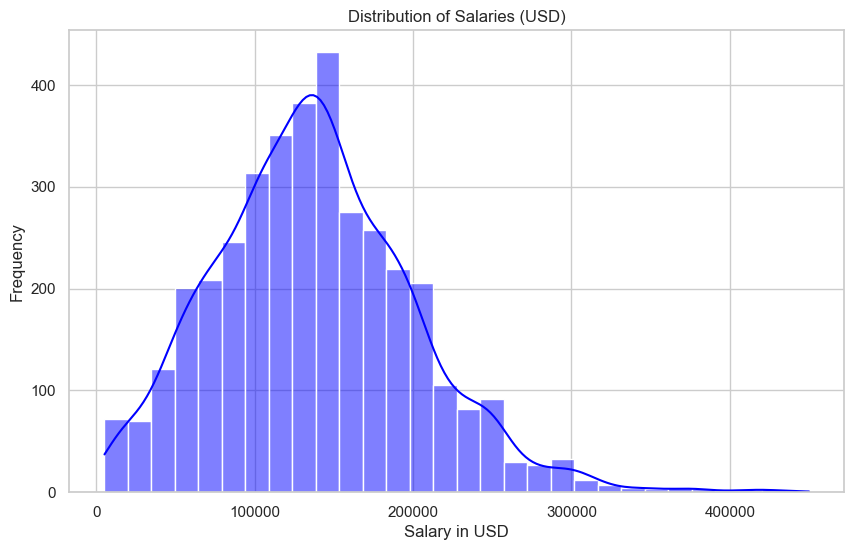

In [32]:
# Set style for Seaborn
sns.set(style="whitegrid")

# Create a histogram or density plot
plt.figure(figsize=(10, 6))
sns.histplot(data=salary_data, x='salary_in_usd', bins=30, kde=True, color='blue')
plt.title('Distribution of Salaries (USD)')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

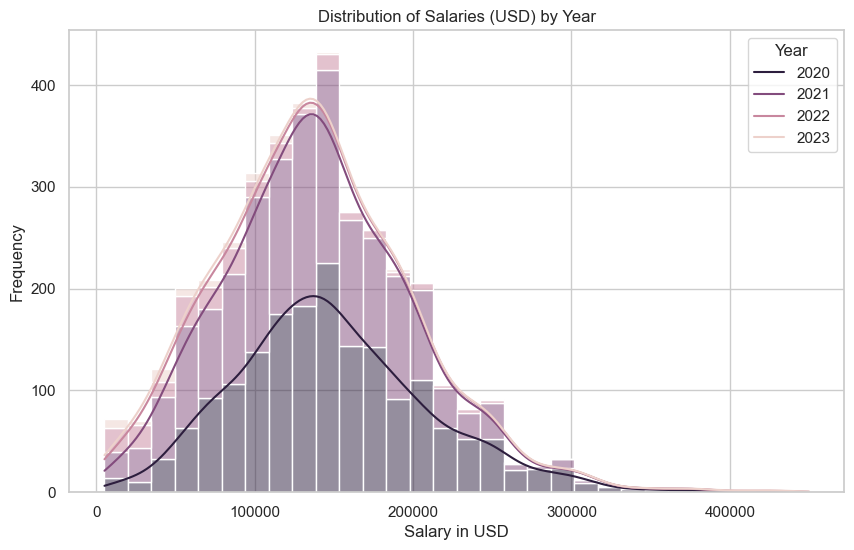

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(data=salary_data, x='salary_in_usd', hue='work_year', bins=30, kde=True, multiple='stack')
plt.title('Distribution of Salaries (USD) by Year')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.legend(title='Year', labels=['2020', '2021', '2022', '2023'])  # Adding labels for each year
plt.show()